Hybrid Quantum Circuit:
        ┌────────────┐ ░ ┌─┐   
   q_0: ┤ Ry(1.1922) ├─░─┤M├───
        ├────────────┤ ░ └╥┘┌─┐
   q_1: ┤ Ry(1.3551) ├─░──╫─┤M├
        └────────────┘ ░  ║ └╥┘
meas: 2/══════════════════╩══╩═
                          0  1 


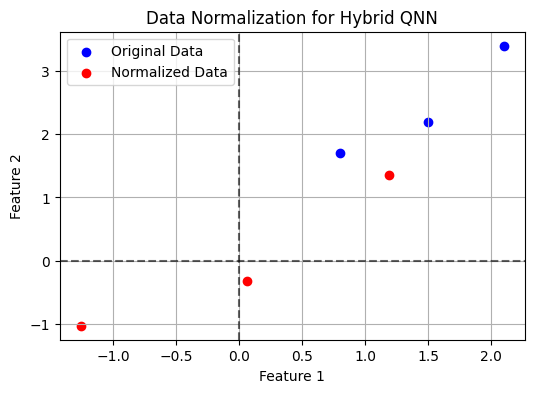

Quantum Circuit Measurement Results: {'01': 212, '11': 118, '10': 257, '00': 413}


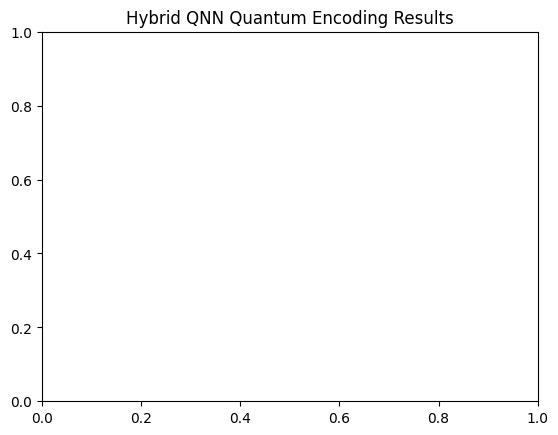

In [1]:
#-------------------------------------------------------------------------
# A Simple Hybrid QNN 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
#-------------------------------------------------------------------------

# Classical preprocessing
data   = np.array([[2.1, 3.4], [1.5, 2.2], [0.8, 1.7]])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Quantum encoding
qc = QuantumCircuit(2)
qc.ry(normalized_data[0][0], 0)
qc.ry(normalized_data[0][1], 1)
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('aer_simulator')
result    = execute(qc, simulator, shots=1000).result()
counts    = result.get_counts()

# Display the quantum circuit
print("Hybrid Quantum Circuit:")
print(qc)
qc.draw('mpl')

# Plot normalized data
plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], label="Original Data", color='blue')
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], label="Normalized Data", color='red')
plt.axhline(0, color='black', linestyle="--", alpha=0.6)
plt.axvline(0, color='black', linestyle="--", alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Normalization for Hybrid QNN")
plt.legend()
plt.grid(True)
plt.show()

# Print and visualize measurement results
print("Quantum Circuit Measurement Results:", counts)
plot_histogram(counts)
plt.title("Hybrid QNN Quantum Encoding Results")
plt.show()
